In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.decomposition import PCA
import autoreload

In [2]:
#New Mexico
nm07 = pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/clean_nm07.csv')
nm17 = pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/clean_nm17.csv')

#Nebraska
ne07 = pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/clean_ne07.csv')
ne17 = pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/clean_ne17.csv')

In [3]:
###### Correlation Dataframe Codes - All Codes in this Cell ######

def corr_df(fullname, dataset):
    """Creates a dataframe on .corr(), used for unit categories."""
    fullname_df = pd.DataFrame()
    for feature in fullname['Table 1']:
        try:
            fullname_df[feature] = dataset[feature]
        except:
            continue
    fullname_df['CAT_ELIG']=dataset['CAT_ELIG'].astype("float64")
    return fullname_df

def corr_numcol(fullname,dataset):
    """Creates a dataframe on .corr(), used for personal characteristics categories."""
    fullname_df=pd.DataFrame()
    for feature in fullname['Table 1']:
        feature = feature[:-1]
        for num in range(1,17):
            combo=str(feature+str(num))
            try:
                fullname_df[combo]=dataset[combo]
            except:
                continue
    fullname_df['CAT_ELIG']=dataset['CAT_ELIG'].astype('float64')
    return fullname_df

def plot_simple_features(column,img_name,description):
    """Plots features on a countplot, used for columns with binary values and for EDA datasets."""
    plt.figure(figsize = (16,10))
    plt.suptitle(description, fontsize=20)
    idx = 221
    while idx<225:
        for key,value in {'nm07':nm07_orig,'nm17':nm17_orig,'ne07':ne07_orig,'ne17':ne17_orig}.items():
            mean = value[column].mean()
            ax = plt.subplot(idx)
            plt.title(f'$\it{key.upper()}$')
            sns.countplot(value[column],palette="husl")
            ax.axhline(mean,linewidth=1,color='r')
            ax.set_xlabel('')
            #ax.set_xticklabels([0,1])
            idx +=1
    plt.savefig("C:/Users/Casey/Desktop/SNAP/Images/Ind_Features/" + str(img_name) + ".png")
    

def plot_features(column,img_name,description):
    """Plots features on a countplot, used for columns with binary values."""
    plt.figure(figsize = (16,10))
    plt.suptitle(description, fontsize=20)
    idx = 221
    while idx<225:
        for key,value in {'nm07':nm07,'nm17':nm17,'ne07':ne07,'ne17':ne17}.items():
            ax = plt.subplot(idx)
            plt.title(f'$\it{key.upper()}$')
            sns.countplot(value[column])
            ax.axhline(y=value[value[column]==1][column].size,linewidth=1,color='r')
            ax.set_xlabel('')
            ax.set_xticklabels([0,1])
            idx +=1
    plt.savefig("C:/Users/Casey/Desktop/SNAP/Images/Ind_Features/" + str(img_name) + ".png")

def plot_features_hist(column,img_name,description):
    """Plots features on a histogram, best for currency columns"""
    plt.figure(figsize = (16,10))
    plt.suptitle(description, fontsize=20)
    idx = 221
    while idx<225:
        for key,value in {'nm07':nm07,'nm17':nm17,'ne07':ne07,'ne17':ne17}.items():
            ax = plt.subplot(idx)
            plt.title(f'$\it{key.upper()}$')
            plt.hist(value[column],bins=20,range=(1,value[column].max()))
            ax.set_xlabel(f"Number of zero's:{value[value[column]==0][column].count()}")
            ax.xaxis.set_label_coords(0.15, 1.05)
            idx +=1
    plt.savefig("C:/Users/Casey/Desktop/SNAP/Images/Ind_Features/" + str(img_name) + ".png")
    
def final(fullname, dataset):
    """Returns a sliced dataset of columns found in corr_features list."""
    fullname_df = pd.DataFrame()
    for feature in fullname:
        try:
            fullname_df[feature] = dataset[feature]
        except:
            continue
    fullname_df['CAT_ELIG']=dataset['CAT_ELIG']
    return fullname_df

In [4]:
###################################
         # 2007 Datasets
###################################

unit07_demo= pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/07_DataDict/UNIT_Demo.csv')
unit07_assets=pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/07_DataDict/UNIT_Assets.csv')
unit07_exded=pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/07_DataDict/UNIT_ExDed.csv')
unit07_inc=pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/07_DataDict/UNIT_Inc.csv')
per07_char=pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/07_DataDict/PERS_Char.csv')
per07_inc=pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/07_DataDict/PERS_Inc.csv')

In [5]:
###################################
         # 2017 Datasets
###################################

unit17_demo= pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/17_DataDict/UNIT_Demo.csv')
unit17_assets=pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/17_DataDict/UNIT_Assets.csv')
unit17_exded=pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/17_DataDict/UNIT_ExDed.csv')
unit17_inc=pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/17_DataDict/UNIT_Inc.csv')
per17_char=pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/17_DataDict/PERS_Char.csv')
per17_inc=pd.read_csv('C:/Users/Casey/Desktop/SNAP/Data/17_DataDict/PERS_Inc.csv')

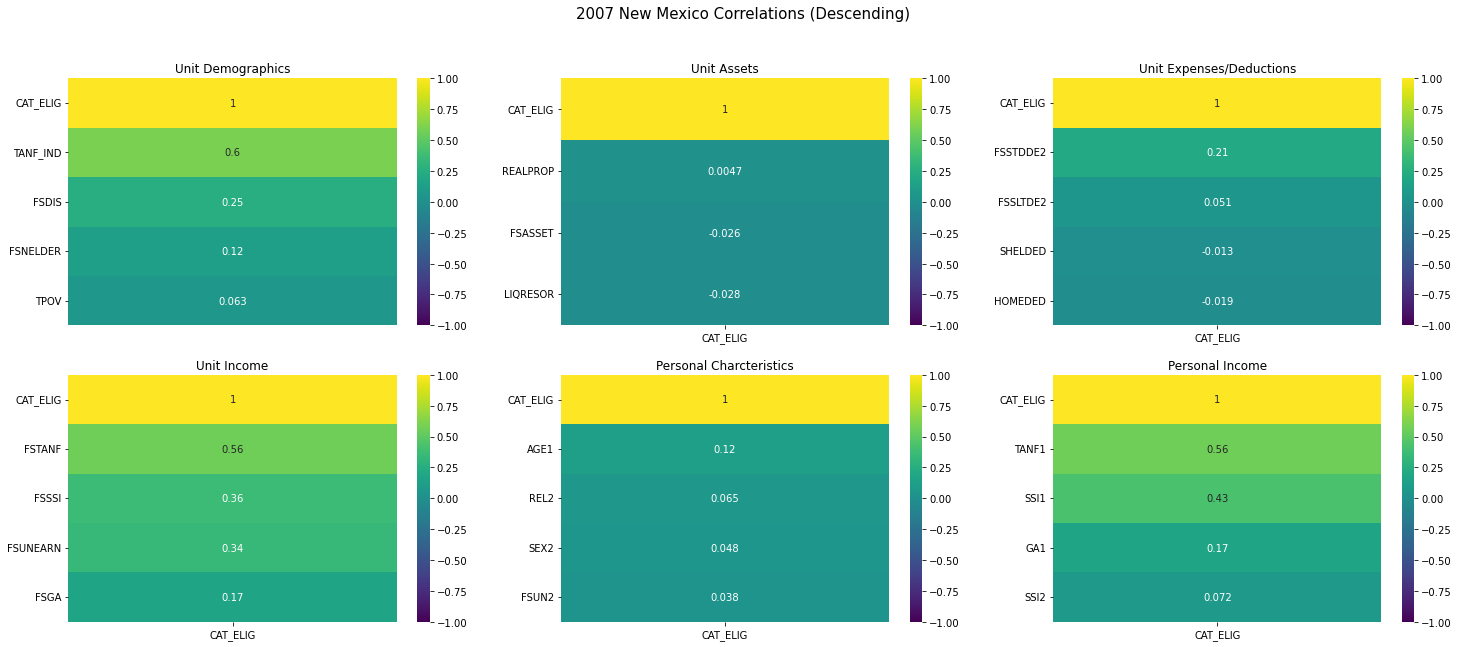

In [6]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 New Mexico Correlations (Descending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(corr_df(unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(corr_df(unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(corr_df(unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(corr_df(unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(corr_numcol(per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(corr_numcol(per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('C:/Users/Casey/Desktop/SNAP/Images/Correlations/corrD_nm07.png');

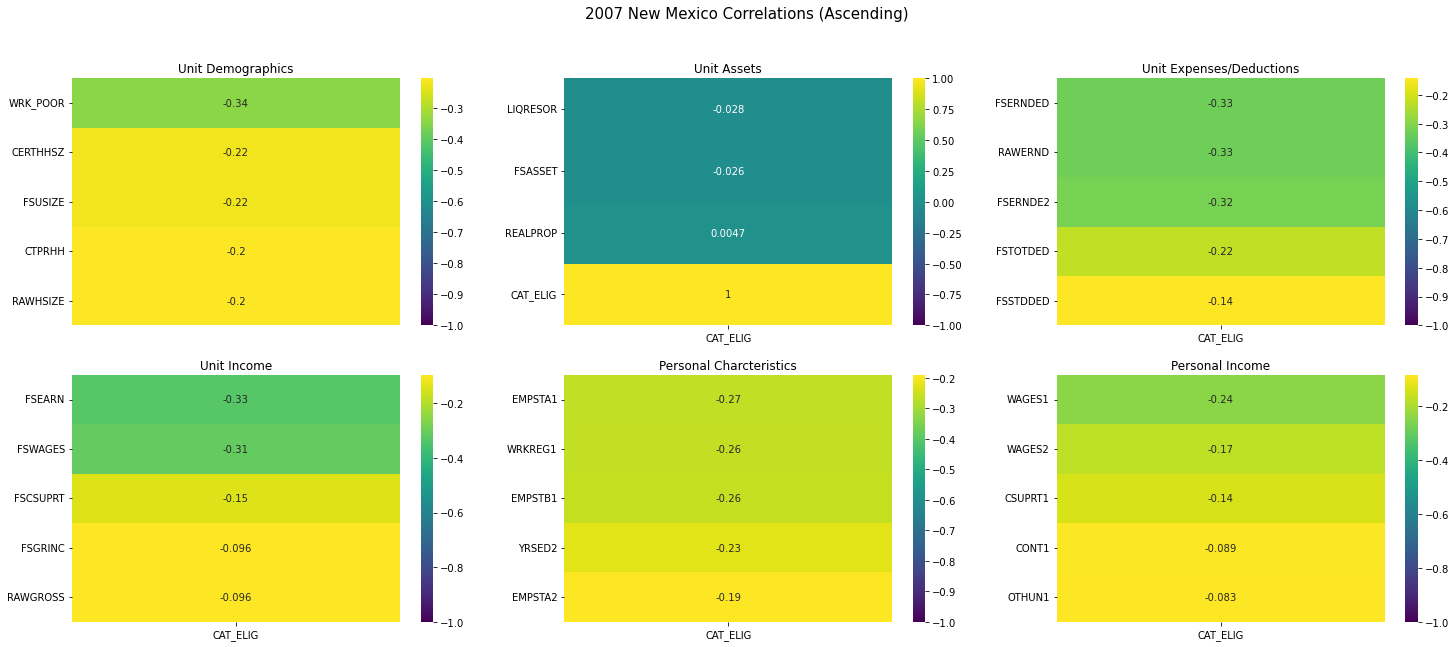

In [7]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 New Mexico Correlations (Ascending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(corr_df(unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(corr_df(unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(corr_df(unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(corr_df(unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(corr_numcol(per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(corr_numcol(per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('C:/Users/Casey/Desktop/SNAP/Images/Correlations/corrA_nm07.png');

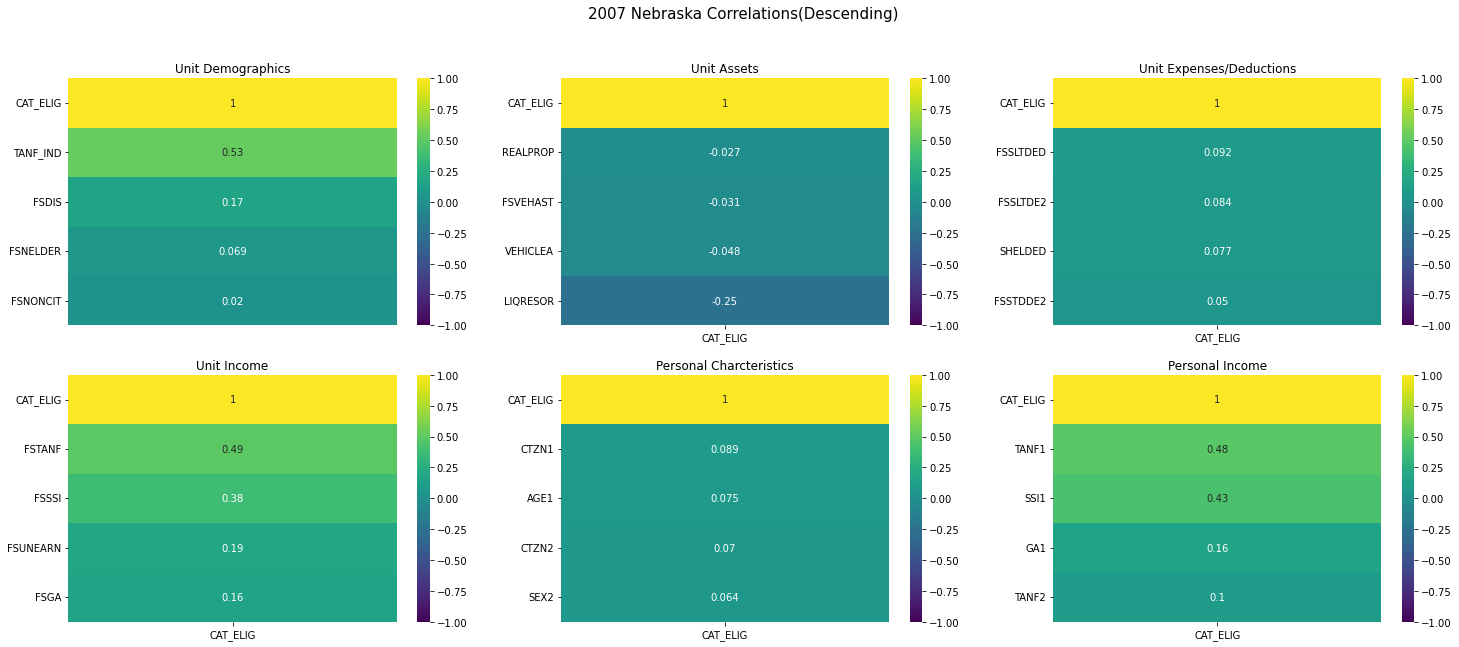

In [8]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 Nebraska Correlations(Descending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(corr_df(unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(corr_df(unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(corr_df(unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(corr_df(unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(corr_numcol(per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(corr_numcol(per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('C:/Users/Casey/Desktop/SNAP/Images/Correlations/corrD_ne07.png');

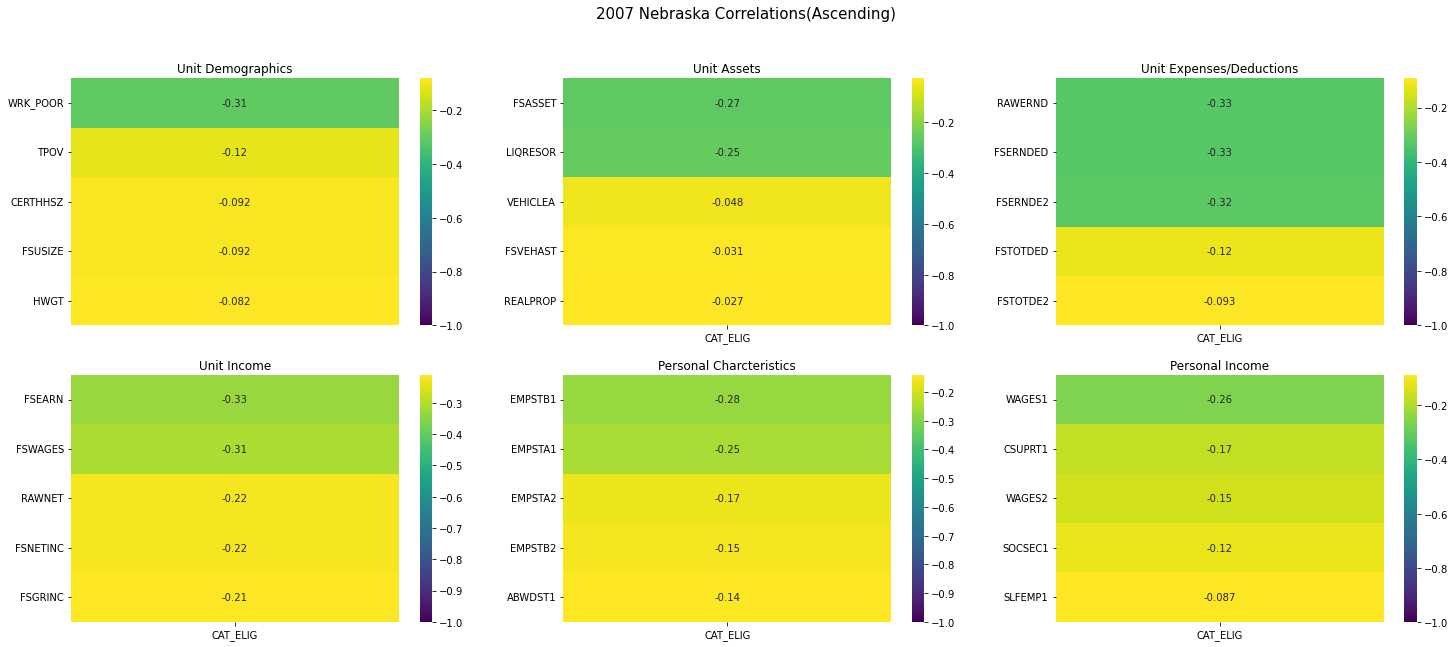

In [9]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 Nebraska Correlations(Ascending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(corr_df(unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(corr_df(unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(corr_df(unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(corr_df(unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(corr_numcol(per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(corr_numcol(per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('C:/Users/Casey/Desktop/SNAP/Images/Correlations/corrA_ne07.png');

C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


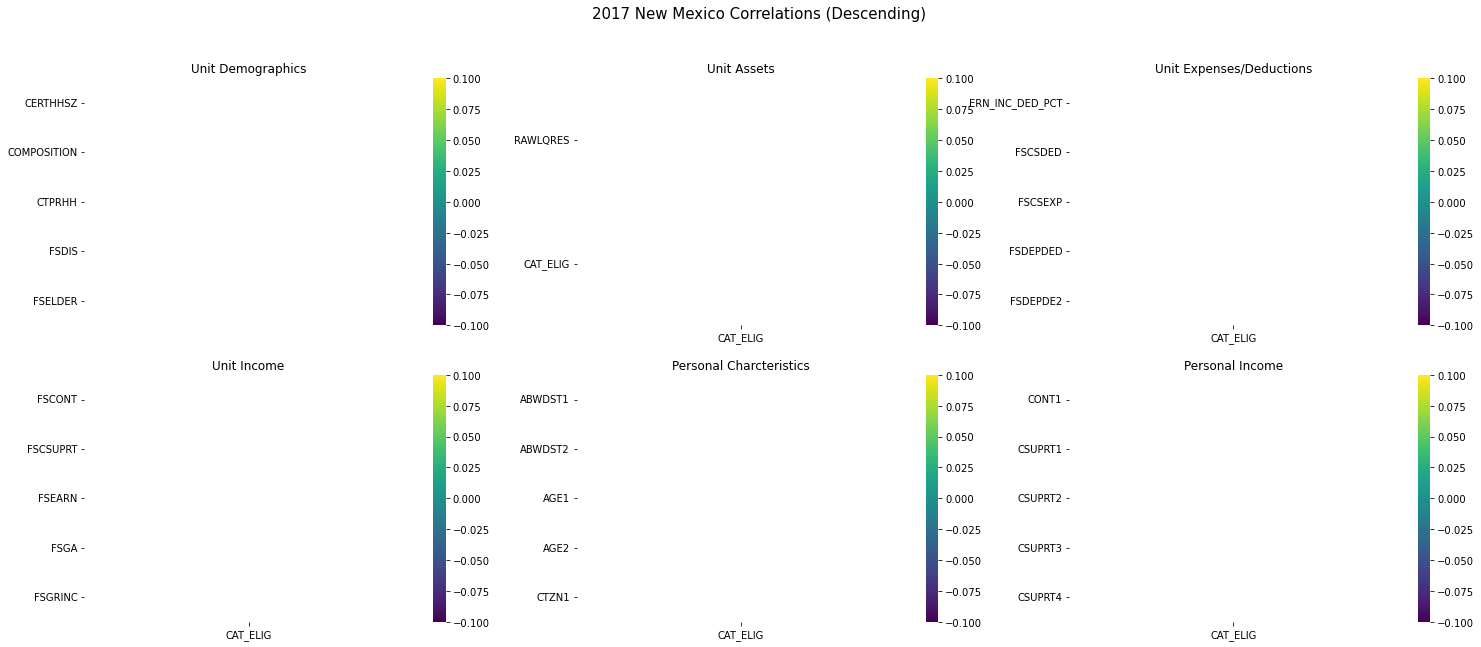

In [11]:
plt.figure(figsize= (25,10))
plt.suptitle("2017 New Mexico Correlations (Descending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(corr_df(unit17_demo, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(corr_df(unit17_assets, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(corr_df(unit17_exded, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(corr_df(unit17_inc, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(corr_numcol(per17_char, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(corr_numcol(per17_inc, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('C:/Users/Casey/Desktop/SNAP/Images/Correlations/corrD_nm17.png');

C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


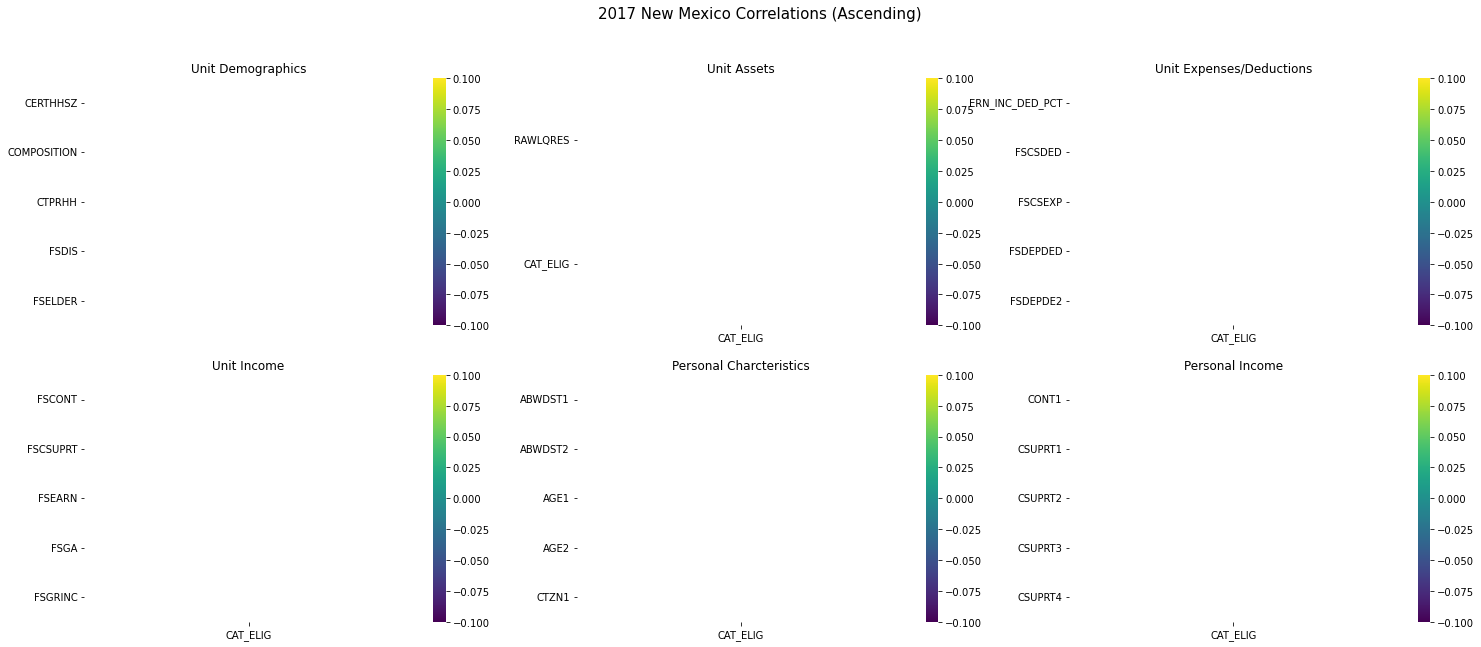

In [12]:
plt.figure(figsize= (25,10))
plt.suptitle("2017 New Mexico Correlations (Ascending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(corr_df(unit17_demo, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(corr_df(unit17_assets, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(corr_df(unit17_exded, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(corr_df(unit17_inc, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(corr_numcol(per17_char, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(corr_numcol(per17_inc, nm17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('C:/Users/Casey/Desktop/SNAP/Images/Correlations/corrA_nm17.png');

C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


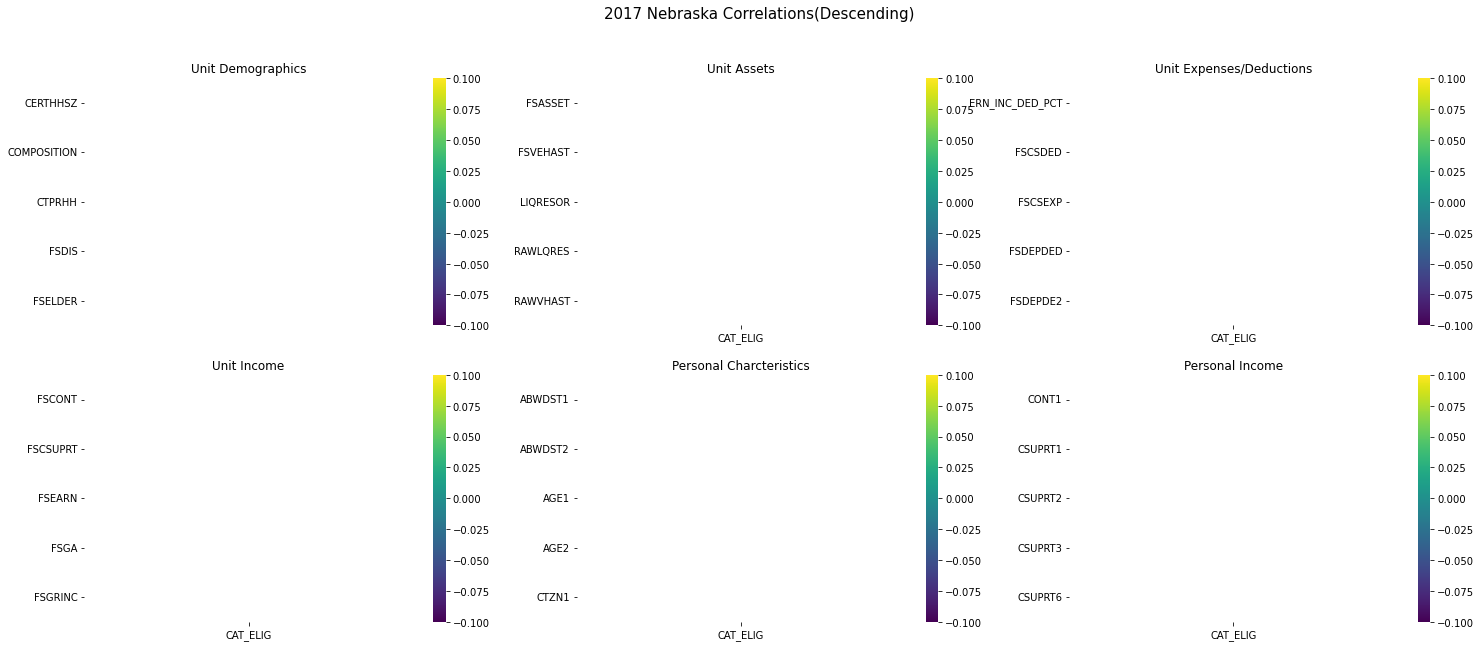

In [13]:
plt.figure(figsize= (25,10))
plt.suptitle("2017 Nebraska Correlations(Descending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(corr_df(unit17_demo, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(corr_df(unit17_assets, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(corr_df(unit17_exded, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(corr_df(unit17_inc, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(corr_numcol(per17_char, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(corr_numcol(per17_inc, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('C:/Users/Casey/Desktop/SNAP/Images/Correlations/corrD_ne17.png');

C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


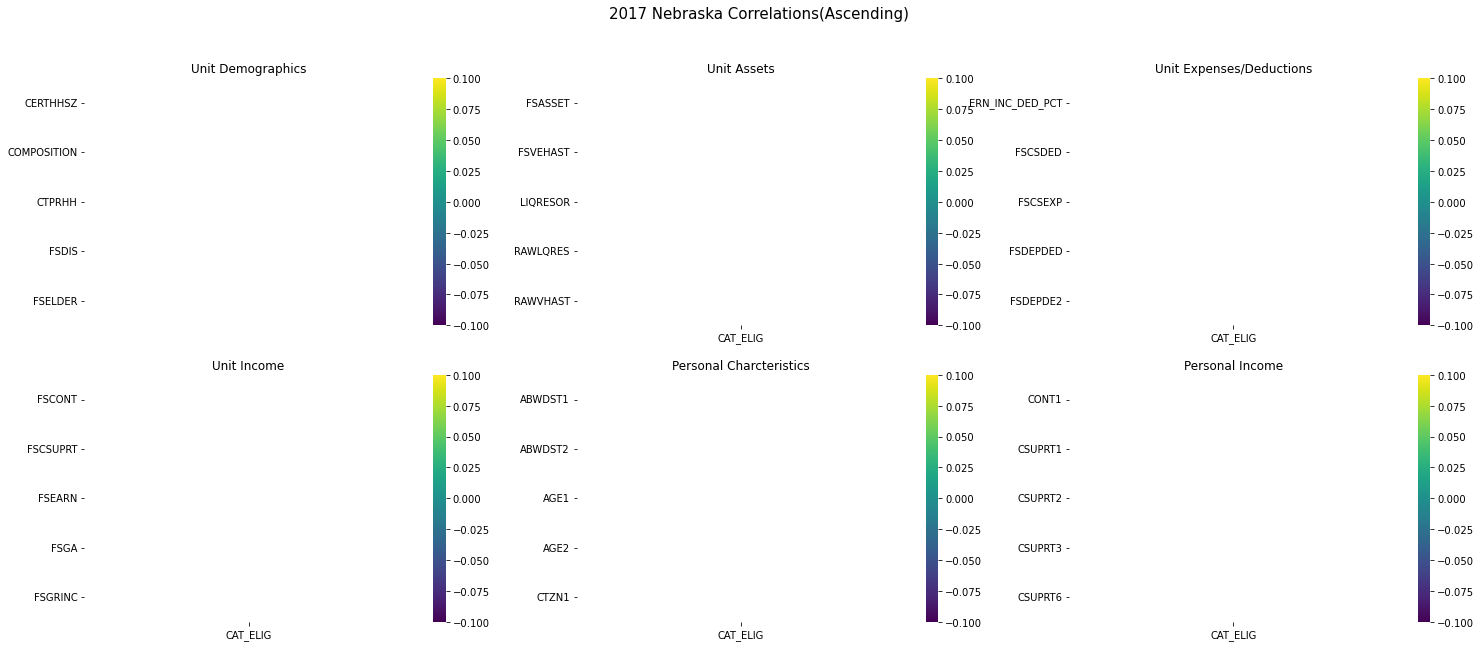

In [14]:
plt.figure(figsize= (25,10))
plt.suptitle("2017 Nebraska Correlations(Ascending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(corr_df(unit17_demo, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(corr_df(unit17_assets, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(corr_df(unit17_exded, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(corr_df(unit17_inc, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(corr_numcol(per17_char, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(corr_numcol(per17_inc, ne17).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('C:/Users/Casey/Desktop/SNAP/Images/Correlations/corrA_ne17.png');

In [15]:
##### Observations #####

# 1. Is the family receiving TANF benefits.
# 2. Is the head of household receiving TANF benefits?
# 3. Is the head of household receiving social security (SSI):
# 4. Are other members in the household receiving social security?

# This tells us that the biggest impact on vulnerable communities within New Mexico Nebraska are due to the head of 
# households personal characteristics. Out of that, we see the biggest impact on SNAP eligibility is receiving benefits 
# from other assistance programs, especially TANF (Temporary Assistance for Needy Families). 
# What is interesting is that is a slightly bigger factor for New Mexico residents over Nebraska residents. 
# And more households/head of households were receiving TANF in 2007. 
# So maybe that accounts for wider eligibility of applicants in 2017, because less people in the SNAP program was 
# receiving TANF income.

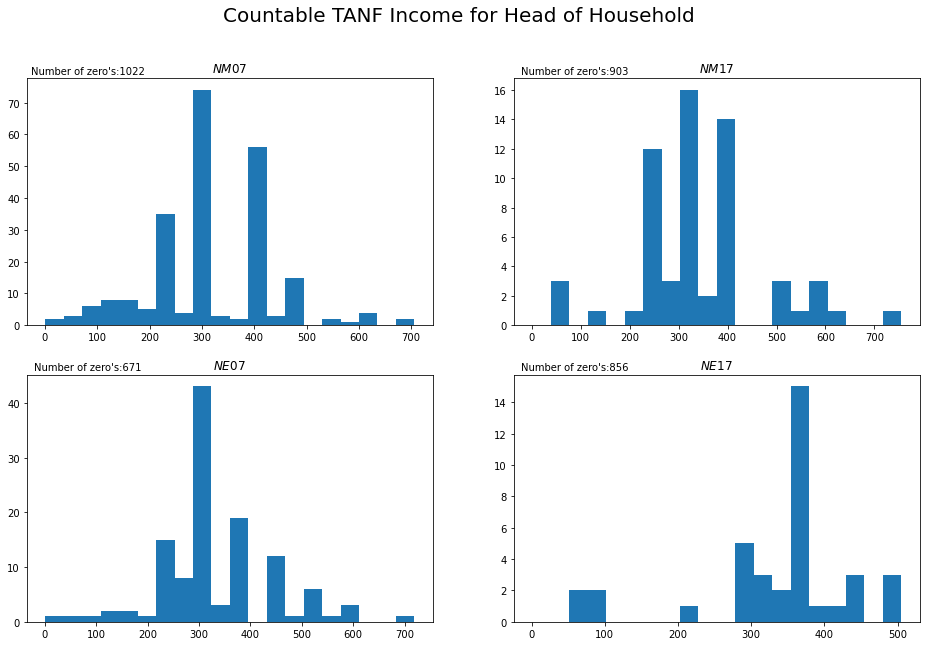

In [16]:
plot_features_hist('FSTANF','unit_tanf',"Countable TANF Income for Head of Household")

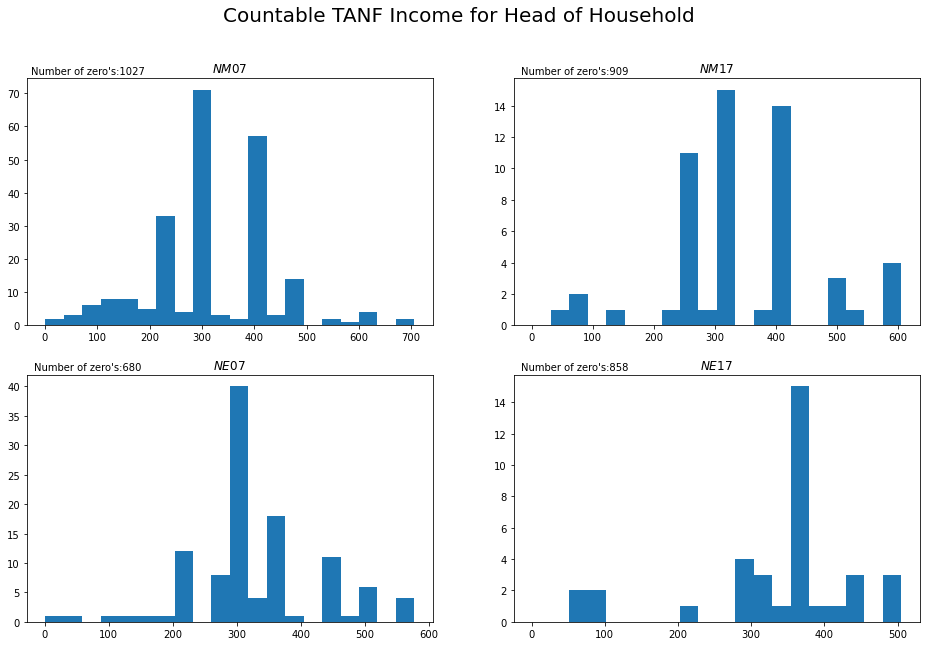

In [17]:
plot_features_hist('TANF1','pers_tanf1',"Countable TANF Income for Head of Household")

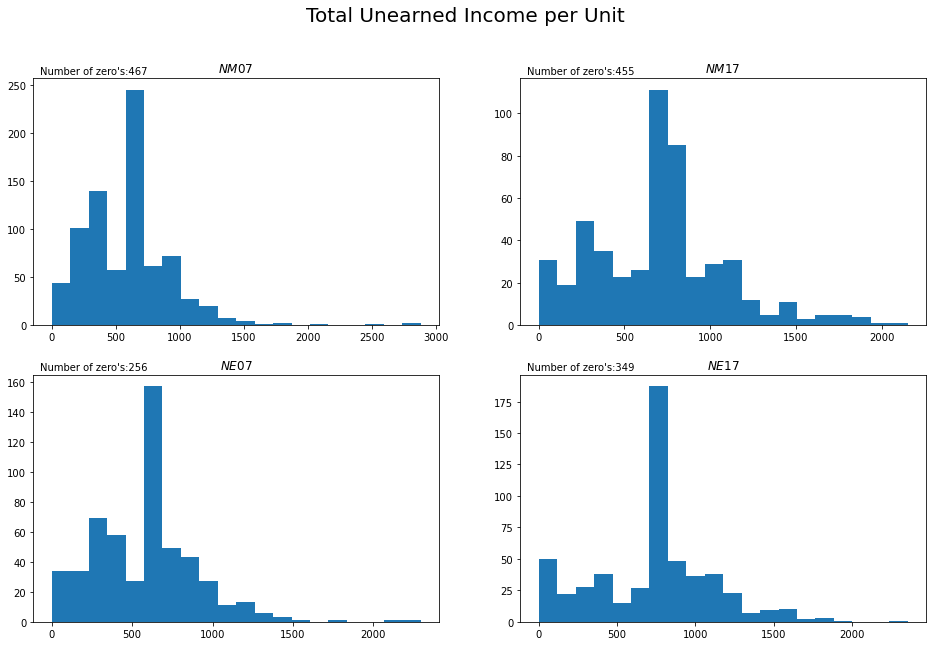

In [18]:
plot_features_hist('FSUNEARN','unit_unearn',"Total Unearned Income per Unit")

C:\Users\Casey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Casey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Casey\anaconda3\lib\si

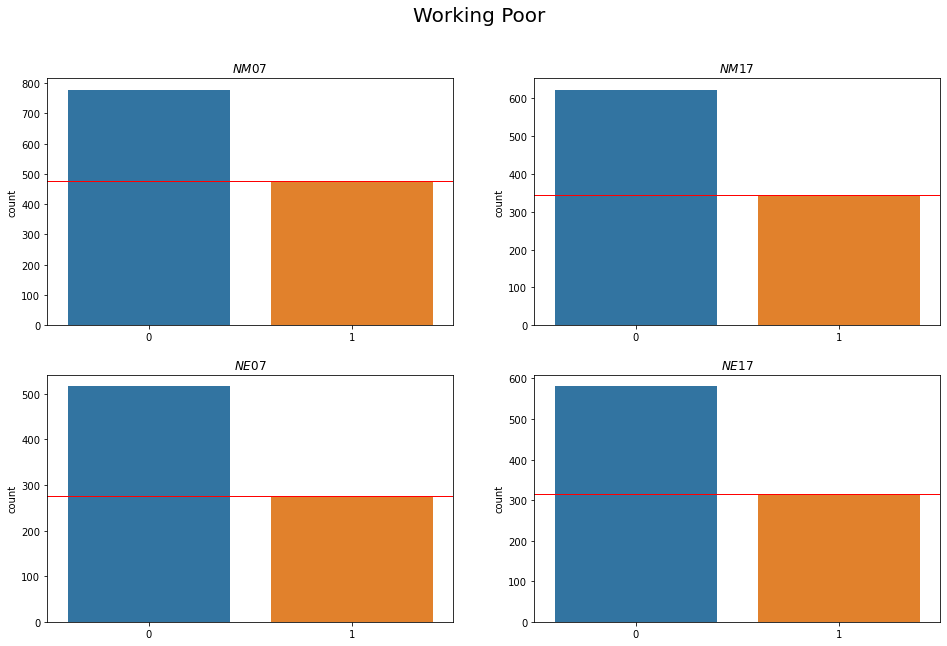

In [19]:
plot_features('WRK_POOR','wrk_pr',"Working Poor")

C:\Users\Casey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


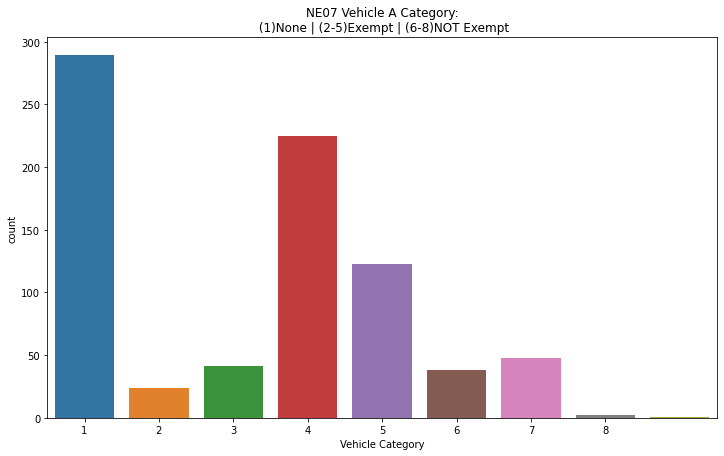

In [20]:
plt.figure(figsize = (12,7))
sns.countplot(ne07['VEHICLEA'])
plt.xticks(np.arange(8),labels=[1,2,3,4,5,6,7,8])
plt.xlabel("Vehicle Category")
plt.title("NE07 Vehicle A Category:\n (1)None | (2-5)Exempt | (6-8)NOT Exempt")
plt.savefig("C:/Users/Casey/Desktop/SNAP/Images/Ind_Features/vehA.png");

In [21]:
##### Correlated Features #####

In [22]:
set1 = list(pd.DataFrame(corr_df(unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set2 = list(pd.DataFrame(corr_df(unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set3 = list(pd.DataFrame(corr_df(unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set4 = list(pd.DataFrame(corr_df(unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set5 = list(pd.DataFrame(corr_df(per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set6 = list(pd.DataFrame(corr_df(per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)

set7 = list(pd.DataFrame(corr_df(unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set8 = list(pd.DataFrame(corr_df(unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set9 = list(pd.DataFrame(corr_df(unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set10 = list(pd.DataFrame(corr_df(unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set11 = list(pd.DataFrame(corr_df(per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set12 = list(pd.DataFrame(corr_df(per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)

corr_features = set1 + set2 + set3 + set4 + set5 + set6 + set7 + set8 + set9 + set10 + set11

In [23]:
set1 = list(pd.DataFrame(corr_df(unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set2 = list(pd.DataFrame(corr_df(unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set3 = list(pd.DataFrame(corr_df(unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set4 = list(pd.DataFrame(corr_df(unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set5 = list(pd.DataFrame(corr_df(per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set6 = list(pd.DataFrame(corr_df(per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)

set7 = list(pd.DataFrame(corr_df(unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set8 = list(pd.DataFrame(corr_df(unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set9 = list(pd.DataFrame(corr_df(unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set10 = list(pd.DataFrame(corr_df(unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set11 = list(pd.DataFrame(corr_df(per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set12 = list(pd.DataFrame(corr_df(per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)

corr_features = set1 + set2 + set3 + set4 + set5 + set6 + set7 + set8 + set9 + set10 + set11
corr_features=set(corr_features)
corr_features.remove('CAT_ELIG')

In [24]:
print(f'There are {len(corr_features)} features in corr_features:\n')
corr_features

There are 32 features in corr_features:



{'CERTHHSZ',
 'FSASSET',
 'FSDIS',
 'FSEARN',
 'FSERNDE2',
 'FSERNDED',
 'FSGA',
 'FSGRINC',
 'FSNELDER',
 'FSNETINC',
 'FSNONCIT',
 'FSSLTDE2',
 'FSSLTDED',
 'FSSSI',
 'FSSTDDE2',
 'FSTANF',
 'FSTOTDE2',
 'FSTOTDED',
 'FSUNEARN',
 'FSUSIZE',
 'FSVEHAST',
 'FSWAGES',
 'HWGT',
 'LIQRESOR',
 'RAWERND',
 'RAWNET',
 'REALPROP',
 'SHELDED',
 'TANF_IND',
 'TPOV',
 'VEHICLEA',
 'WRK_POOR'}

In [25]:
##### Final Dataset #####

In [26]:
corr_features=list(corr_features)
pd.DataFrame(corr_features,columns=['Table 1']).to_csv("C:/Users/Casey/Desktop/SNAP/Data/corr_features.csv",index=None)

In [27]:
df1 = final(corr_features,nm07)
df2 = final(corr_features,nm17)
df3 = final(corr_features,ne07)
df4 = final(corr_features,ne17)

In [28]:
df = pd.concat([df1,df2,df3,df4])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3904 entries, 0 to 893
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FSEARN    3904 non-null   float64
 1   LIQRESOR  2940 non-null   float64
 2   FSTOTDE2  3904 non-null   float64
 3   TPOV      3904 non-null   float64
 4   TANF_IND  3904 non-null   float64
 5   WRK_POOR  3904 non-null   float64
 6   FSERNDED  3904 non-null   float64
 7   FSNETINC  3904 non-null   float64
 8   HWGT      3904 non-null   float64
 9   RAWERND   3904 non-null   float64
 10  FSSTDDE2  3904 non-null   float64
 11  FSSSI     3904 non-null   float64
 12  FSGA      3904 non-null   float64
 13  FSSLTDE2  3904 non-null   float64
 14  REALPROP  2046 non-null   float64
 15  FSTOTDED  3904 non-null   float64
 16  FSERNDE2  3904 non-null   float64
 17  FSASSET   2940 non-null   float64
 18  FSUSIZE   3904 non-null   float64
 19  FSUNEARN  3904 non-null   float64
 20  FSGRINC   3904 non-null   float

In [30]:
df['VEHICLEA']=df['VEHICLEA'].fillna(1)

In [31]:
df.isnull().sum()

FSEARN         0
LIQRESOR     964
FSTOTDE2       0
TPOV           0
TANF_IND       0
WRK_POOR       0
FSERNDED       0
FSNETINC       0
HWGT           0
RAWERND        0
FSSTDDE2       0
FSSSI          0
FSGA           0
FSSLTDE2       0
REALPROP    1858
FSTOTDED       0
FSERNDE2       0
FSASSET      964
FSUSIZE        0
FSUNEARN       0
FSGRINC        0
RAWNET         0
FSNELDER       0
SHELDED        0
CERTHHSZ       0
FSWAGES        0
FSSLTDED       0
FSDIS          0
FSTANF         0
FSNONCIT       0
CAT_ELIG       0
FSVEHAST    2219
VEHICLEA       0
dtype: int64

In [32]:
df = df.fillna(0)

In [33]:
df.isnull().sum().sum()

0

In [34]:
df.to_csv('C:/Users/Casey/Desktop/SNAP/Data/final.csv',index=None)